In [1]:
# Gathering the essential libraries
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

In [2]:
# Loading the training dataset from a CSV file
train_data = pd.read_csv('loan-train.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Removing any entries with missing data from the training dataset
train_data.dropna(inplace=True)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Encoding the string into binary elements
encode = ['Loan_ID']
encode_small = ['Education','Self_Employed','Property_Area','Loan_Status','Gender','Married','Dependents']
encoder_small = LabelEncoder()
for column in encode_small:
    train_data[column] = encoder_small.fit_transform(train_data[column])
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [5]:
encoder = ce.BinaryEncoder(cols=encode)
train_data = encoder.fit_transform(train_data)
train_data

,Loan_ID_0,Loan_ID_1,Loan_ID_2,Loan_ID_3,Loan_ID_4,Loan_ID_5,Loan_ID_6,Loan_ID_7,Loan_ID_8,Gender,...,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,0,0,0,0,0,0,1,1,1,...,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,0,0,0,0,0,1,0,1,1,...,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,0,1,1,1,0,0,0,...,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,1,0,1,1,1,0,1,1,...,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,1,1,1,1,0,1,...,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,1,0,1,1,1,1,1,1,...,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [6]:
loan_status = 'Loan_Status'
output = train_data[loan_status]
output

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [7]:
input = train_data.drop('Loan_Status',axis=1)
input

,Loan_ID_0,Loan_ID_1,Loan_ID_2,Loan_ID_3,Loan_ID_4,Loan_ID_5,Loan_ID_6,Loan_ID_7,Loan_ID_8,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,0,0,0,0,0,0,0,1,0,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,0,0,0,0,0,0,0,1,1,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,0,0,0,0,0,0,1,0,1,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,0,1,1,1,0,0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,1,0,1,1,1,0,1,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,1,1,1,1,0,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,1,0,1,1,1,1,1,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [8]:
lr_model = LogisticRegression()
lr_model.fit(input,output)

C:\Users\Arjun Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
test_data = pd.read_csv('loan-test.csv')
test_data.dropna(inplace=True)
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [10]:
encode_test = ['Loan_ID']
encode_small_test = ['Education','Self_Employed','Property_Area','Gender','Married','Dependents']
encoder_small_test = LabelEncoder()
for column in encode_small_test:
    test_data[column] = encoder_small_test.fit_transform(test_data[column])
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [11]:
encoder_test = ce.BinaryEncoder(cols=encode)
test_data = encoder_test.fit_transform(test_data)
test_data

,Loan_ID_0,Loan_ID_1,Loan_ID_2,Loan_ID_3,Loan_ID_4,Loan_ID_5,Loan_ID_6,Loan_ID_7,Loan_ID_8,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,0,0,0,0,0,0,0,1,1,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,0,0,0,0,0,0,1,0,1,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0,0,0,1,1,1,0,1,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1
362,1,0,0,0,1,1,1,1,0,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,0,0,0,1,1,1,1,1,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
365,1,0,0,1,0,0,0,0,0,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [12]:
output_train = lr_model.predict(input)
acc_score = accuracy_score(output,output_train)
print("Accuracy:",acc_score)

Accuracy: 0.8104166666666667


In [13]:
cm = confusion_matrix(output, output_train)
print(cm)

[[ 68  80]
 [ 11 321]]


In [14]:
output_test = lr_model.predict(test_data)
output_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [15]:
#loan approval count
count_y = 0
count_n =0

for i in output_test:
    if i == 1:
        count_y = count_y+1
    else:
        count_n = count_n+1

Loan_Status Graph:



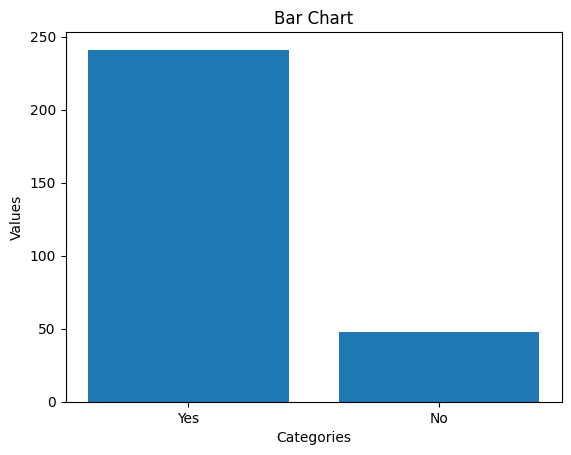

In [17]:
#loan status graph
categories = ['Yes','No']
values = [count_y,count_n]
print('Loan_Status Graph:\n')
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')
plt.show()